In [1]:
import numpy as np
import h5py, os, copy
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter as gf

# Part to change plotting system
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,6)
plt.rc('font',family='serif')
plt.rcParams.update({'font.size': 24})
plt.rc('text', usetex=True)
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'

### Figure 2

/var/folders/zy/sq3smjgs6f31fd65nkw0_c740000gn/T/ipykernel_44879/3115684572.py:66: RuntimeWarning: divide by zero encountered in log10
  im = ax2.imshow(np.rot90(np.log10(neg_avg))[::,0:11],cmap='viridis',aspect='auto',extent=(0-0.5,11-0.5,np.log10(times[0]),np.log10(times[-1])),interpolation='None')


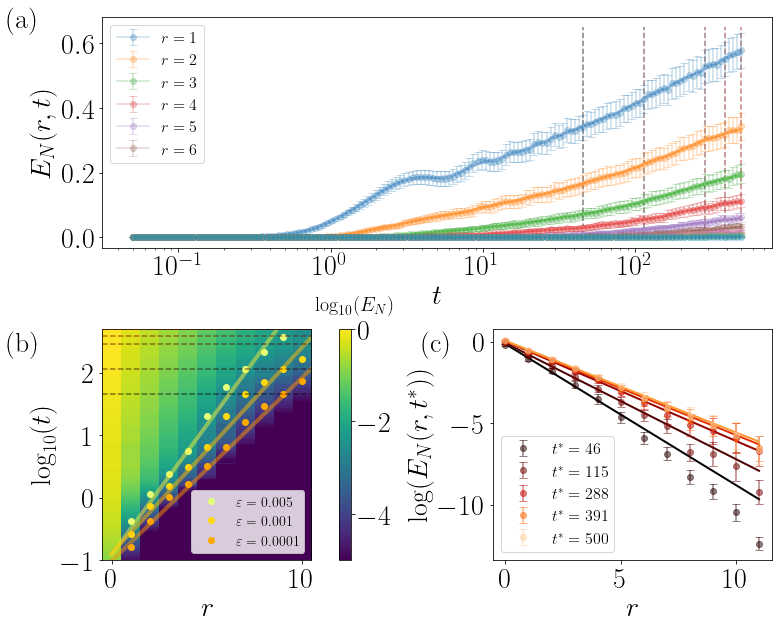

In [2]:
mpl.rcParams['figure.figsize'] = (12,10)
plt.rcParams.update({'font.size': 28})
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20.colors)

fig = plt.figure()
gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

ax1.set_prop_cycle(plt.cycler("color", plt.cm.tab20.colors))
nc = 7
color = plt.cm.Wistia(np.linspace(0, 1,nc))
ax2.set_prop_cycle(plt.cycler("color", color))
nc = 11
color = plt.cm.gist_heat(np.linspace(0, 1,nc))
ax3.set_prop_cycle(plt.cycler("color", color))

n = 24
d = 8.0
reps = 100
times = np.logspace(np.log10(0.05),np.log10(500),151,base=10,endpoint=True)

for chimax in [192]:
    neg = np.zeros((reps,n,len(times)))
    err_avg = np.zeros((reps))
    dE_avg = np.zeros((reps))
    ent_avg = np.zeros((reps,len(times)))
    energy_avg = np.zeros((reps,len(times)))
    for p in range(reps):
        with h5py.File('data/dyn_L%s_X%s_d%.2f_p%.2f.h5' %(n,chimax,d,p),'r') as hf:
            err0 = np.array(hf.get('err'))
            neg0 = np.array(hf.get('neg'))
            neg[p] = neg0

            err_avg[p] = err0.real

    neg_avg = (np.mean(neg,axis=0))
    neg_var = np.sqrt(np.var(neg,axis=0))/np.sqrt(reps)
    ent = np.mean(ent_avg,axis=0)

    for r in range(1,n//2):
        if r < 7:
            ax1.errorbar(times,neg_avg[r],(neg_var[r]),fmt='o-',capsize=4,alpha=0.25,label=r'$r = %s$' %r)
        else:
            ax1.errorbar(times,neg_avg[r],(neg_var[r]),fmt='o-',capsize=4,alpha=0.25)
        ax1.plot(times,gf(neg_avg[r],3),linewidth=3)
ax1.legend(fontsize=16)
ax1.set(ylabel=r'$E_N(r,t)$',xlabel=r'$t$',xscale='log')

mpl.rcParams['figure.figsize'] = (12,6)

#-------------------------------------------
# Set up colourmaps
from matplotlib.colors import ListedColormap
if os.path.exists('New_Lacerta.csv'):
    clr = np.genfromtxt('New_Lacerta.csv',delimiter=',')
    lc = ListedColormap(clr)
    lcr = ListedColormap(np.flip(clr,axis=0))
else:
    lc = 'seismic'
    lcr = 'seismic'
    
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Paired.colors)
        
im = ax2.imshow(np.rot90(np.log10(neg_avg))[::,0:11],cmap='viridis',aspect='auto',extent=(0-0.5,11-0.5,np.log10(times[0]),np.log10(times[-1])),interpolation='None')
im.set_clim(-5,0)
fig.colorbar(im,orientation="vertical", pad=0.1,ax=ax2)

for cutoff in [5e-3,1e-3,1e-4]:
    rtlist = []
    for r in range(n):
        tlist = []
        for t in range(len(times)):
            if neg_avg[r,t]>cutoff:
                tlist += [times[t]]
        if len(tlist)>0:
            rtlist += [tlist[0]]

    ax2.plot(np.log10(rtlist),'o',label=r'$\varepsilon = %s$' %cutoff)
    fit,cov = np.polyfit(range(len(rtlist)),np.log10(rtlist),1,cov=True)
    ax2.plot(range(12),([fit[0]*i + fit[1] for i in range(12)]),linewidth=4,alpha=0.5)
    
ax2.set(ylim=(-1,np.log10(times[-1])),xlim=(-0.5,10.5))
ax2.text(10.7,3.,r'$\log_{10}(E_N)$',fontsize=20)
ax2.legend(fontsize=14,loc='lower right')
ax2.set(ylabel=r'$\log_{10}(t)$')
ax2.set(xlabel=r'$r$')


for time in [-40,-25,-10,-5,-1]:
    lc = n//2
    xilist0 = [neg_avg[r,time] for r in range(n)]
    xilist = xilist0[0:lc]
    xilist0_var = [neg_var[r,time] for r in range(n)]
    xilist_var = xilist0_var[0:lc]
    
    lc2 = n//4
    fit,cov = np.polyfit(range(lc2),np.log(xilist[0:lc2]),1,cov=True)
    
    ax3.plot(range(n//2),[fit[0]*i + fit[1] for i in range(n//2)],'-',linewidth=2,alpha=1.)
    log_err = [(xilist_var[i])/(xilist[i]) for i in range(len(xilist))]
    ax3.errorbar(range(lc),np.log(xilist),log_err,fmt='o',label=r'$t^{*} = %.0f$' %times[time],capsize=4,alpha=0.5)

ax1.vlines([times[t] for t in [-40,-25,-10,-5,-1]],0.,.65,colors=color,linestyles='dashed',alpha=0.5,zorder=0)

ax2.hlines([np.log10(times[t]) for t in [-40,-25,-10,-5,-1]],-0.5,11,colors=color,linestyles='dashed',alpha=0.5,zorder=30)
    
ax3.set(ylabel=(r'$\log(E_N(r,t^*))$'),xlabel=r'$r$')
ax3.legend(fontsize=16)

ax1.text(0.0075,0.65,r'(a)')
ax1.text(0.0075,-0.35,r'(b)')
ax1.text(4,-0.35,r'(c)')

# ax1.set(xlim=(0,10),ylim=(0,0.5))
fig.align_ylabels()
plt.subplots_adjust(hspace=0.35,wspace=0.4)
plt.savefig('fig2.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

### Figure 3

In [3]:
# Compute eigenstates of the non-interacting system
# (This can be done quickly and easily, as it's non-interacting, so I don't store any data here. 
# It gets recomputed on the fly and will be slightly different each time.)

n = 128
reps = 10000
dis = range(2,11)

dc = 0
anderson_xi_list = np.zeros(len(dis))
anderson_xi_var = np.zeros(len(dis))
for W in dis:
    psi_avg = np.zeros((reps,n))
    for p in range(reps):
        H = np.zeros((n,n))
        for i in range(n):
            H[i,i] = np.random.uniform(-W,W)
        H += 0.5*np.diag(np.ones(n-1),1) + 0.5*np.diag(np.ones(n-1),-1)
        E,V = np.linalg.eigh(H)
        for i in range(n):
            psi = V[:,i]
            # Pick out eigenstate peaked on central site
            if np.max(np.abs(psi)) == np.abs(psi[n//2]):
                psi_avg[p] = np.abs(psi)

    psi = np.mean(psi_avg,axis=0)
    fit,cov = np.polyfit(range(15,n//2-15),np.log(np.abs(psi))[15:n//2-15],1,cov=True)

    anderson_xi_list[dc] = 1/fit[0]
    anderson_xi_var[dc] = ((np.diag(cov)[0])/fit[0]**2)*(1/fit[0])**2
    dc +=1
    
print(anderson_xi_list)

[2.75455178 1.57510431 1.17942002 1.01577212 0.9431922  0.82671387
 0.67620849 0.65763395 0.62220072]


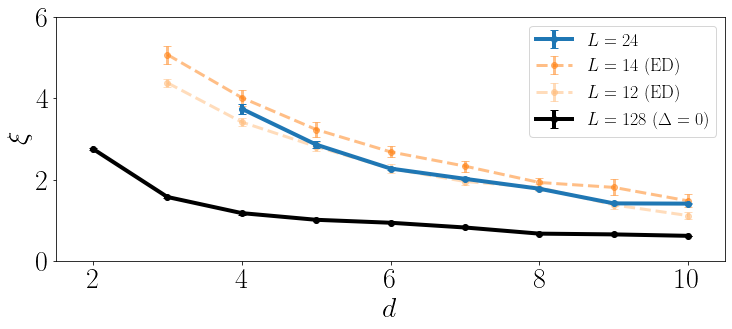

In [4]:
# Make the figure

mpl.rcParams['figure.figsize'] = (12,4.5)
plt.rcParams.update({'font.size': 28})
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20.colors)

dlist = range(1,11)

pair_list = np.array([[24,192,100]])
xi_final = np.zeros((len(pair_list),len(dlist)))
xi_final_var = np.zeros((len(pair_list),len(dlist)))

pc = 0
for pair in pair_list:
    
    n,chimax,reps = [p for p in pair]
    
    dc = 0
    times = np.logspace(np.log10(0.05),np.log10(500),151,base=10,endpoint=True)    
    dlist = range(4,11)
    
    final_list_log = np.zeros(len(dlist))
    final_var_log = np.zeros(len(dlist))

    for d in dlist:

            logneg = []
            plist = []
            repcount = 0
            for p in range(reps):
                neg0 = []
                try:
                    with h5py.File('data/dyn_L%s_X%s_d%.2f_p%.2f.h5' %(n,chimax,d,p),'r') as hf:
                        neg0 = np.array(hf.get('neg'))
                        if len(neg0[0]) == 151:
                            logneg += [neg0]
                            repcount += 1
                except:
                    plist += [p]
            logneg = np.array(logneg)

            logneg = np.mean(logneg,axis=0)
            logneg_var = np.var(logneg,axis=0)
            
            xilist0 = [logneg[r,-1] for r in range(n)]
            fitavg = 0.
            for lc2 in [n//4]:
                xilist = xilist0[0:lc2]

                fit,cov = np.polyfit(range(lc2),np.log(xilist0[0:lc2]),1,cov=True)
                fitavg += fit[0]

            final_list_log[dc] = -1/fitavg
            final_var_log[dc] = ((np.diag(cov)[0])/fit[0]**2)*(1/fit[0])**2
            
            dc += 1
    
    plt.errorbar(dlist,final_list_log,np.sqrt(final_var_log),fmt='o-',capsize=4,label = r'$L = %s$' %(n),linewidth=4,zorder=n)
    plt.errorbar(dlist,final_list_log,np.sqrt(final_var_log),fmt='o-',capsize=4,linewidth=4,zorder=n,alpha=0)

    pc += 1
        
with h5py.File('lbit_len.hdf5','r') as hf:
    L12_mean = np.array(hf.get('/L12_partial_trace/mean_list'))
    L12_err = np.array(hf.get('/L12_partial_trace/error_list'))
    L14_mean = np.array(hf.get('/L14_partial_trace/mean_list'))
    L14_err = np.array(hf.get('/L14_partial_trace/error_list'))
    
dlist = range(3,11)
plt.errorbar(dlist,L14_mean,L14_err,fmt='o--',capsize=4,label=r'$L=14$ (ED)',alpha=0.5,linewidth=3)
plt.errorbar(dlist,L12_mean,L12_err,fmt='o--',capsize=4,label=r'$L=12$ (ED)',alpha=0.5,linewidth=3)

plt.errorbar(dis[::],anderson_xi_list[::],np.sqrt(anderson_xi_var[::]),fmt='ko-',label=r'$L=128$ $(\Delta = 0)$',capsize=4,linewidth=4)

plt.xlim(1.5,10.5)
plt.ylim(0,6)
plt.ylabel(r'$\xi$')
plt.xlabel(r'$d$')
plt.legend(fontsize=18,loc='upper right')
plt.savefig('fig3.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

# Supplemental Figures

### SM 1

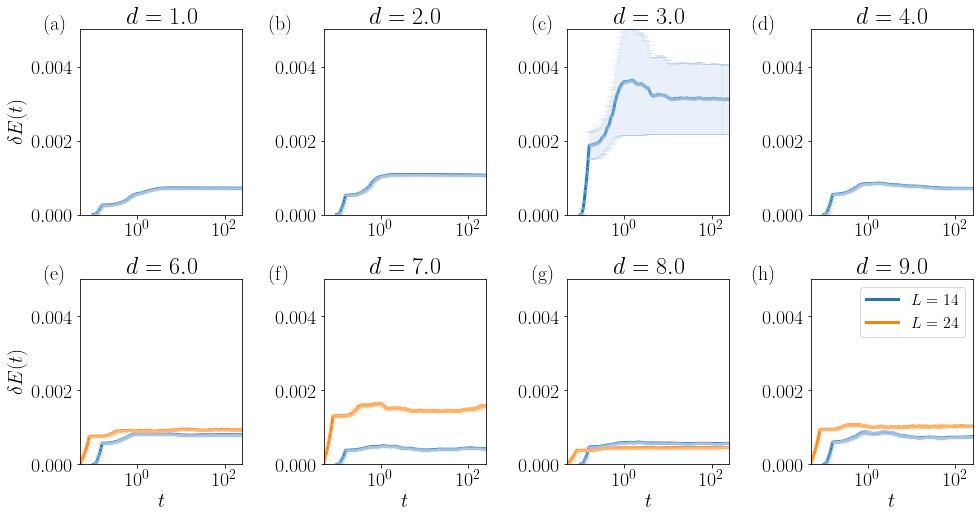

In [5]:
mpl.rcParams['figure.figsize'] = (16,8)
plt.rcParams.update({'font.size': 20})
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20.colors)
fig, axes = plt.subplots(2,4)
ax1,ax2,ax3,ax4 = axes[0]
bx1,bx2,bx3,bx4 = axes[1]
axlist = [ax1,ax2,ax3,ax4,bx1,bx2,bx3,bx4]

for n in [14,24]:
    if n == 14:
        reps = 240
        chimax = 128
        times = np.logspace(-1,2.4,151,base=10,endpoint=True)
        dlist = [1.0,2.0,3.0,4.0,6.0,7.0,8.0,9.0]
        dc = 0
    elif n == 24:
        reps = 100
        chimax = 192
        times = np.logspace(np.log10(0.05),np.log10(500),151,base=10,endpoint=True)
        dlist = [6.0,7.0,8.0,9.0]
        dc = 4

    for d in dlist:
        ax = axlist[dc]
        neg = np.zeros((reps,n,len(times)))
        err_avg = np.zeros((reps))
        dE_avg = np.zeros((reps))
        ent_avg = np.zeros((reps,len(times)))
        energy_avg = np.zeros((reps,len(times)))
        for p in range(reps):
            with h5py.File('data/dyn_L%s_X%s_d%.2f_p%.2f.h5' %(n,chimax,d,p),'r') as hf:
                energy = np.array(np.real(hf.get('energy')))

                energy_avg[p] = np.abs(energy.real - energy.real[0])/np.abs(energy.real[0])

        ax.plot(times,np.mean(energy_avg,axis=0),'-',linewidth=3,label=r'$L = %s$' %n)
        ax.errorbar(times,np.mean(energy_avg,axis=0),np.var(energy_avg,axis=0),fmt='.',alpha=0.25,linewidth=1,capsize=4)
        ax.set(xscale='log',title=r'$d = %s$' %d,ylim=(0,0.005),xlim=(0.05,250))

        dc += 1

plt.xscale('log')
ax1.set(ylabel=r'$\delta E(t)$')
bx1.set(ylabel=r'$\delta E(t)$')
bx1.set(xlabel=r'$t$')
bx2.set(xlabel=r'$t$')
bx3.set(xlabel=r'$t$')
bx4.set(xlabel=r'$t$')
ax1.text(0.0075,0.005,r'(a)')
ax1.text(1e3,0.005,r'(b)')
ax1.text(1e9,0.005,r'(c)')
ax1.text(1e14,0.005,r'(d)')
bx1.text(0.0075,0.005,r'(e)')
bx1.text(1e3,0.005,r'(f)')
bx1.text(1e9,0.005,r'(g)')
bx1.text(1e14,0.005,r'(h)')
bx4.legend(fontsize=16)
plt.xlabel(r'$t$')
plt.subplots_adjust(hspace=0.35,wspace=0.5)
plt.savefig('SM_1.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

### SM 2

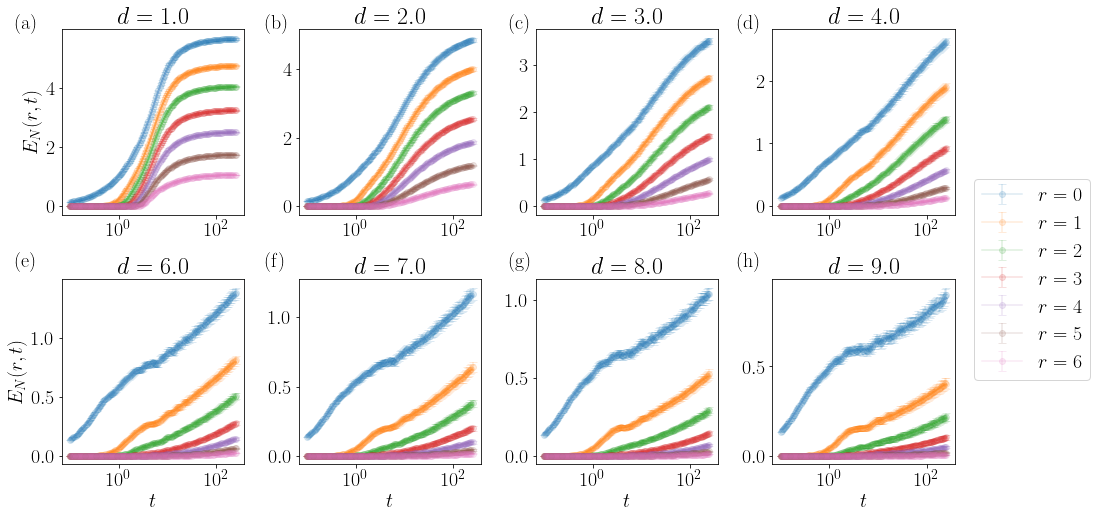

In [6]:
mpl.rcParams['figure.figsize'] = (16,8)
plt.rcParams.update({'font.size': 20})
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20.colors)
fig, axes = plt.subplots(2,4)
ax1,ax2,ax3,ax4 = axes[0]
bx1,bx2,bx3,bx4 = axes[1]
axlist = [ax1,ax2,ax3,ax4,bx1,bx2,bx3,bx4]

n = 14
reps = 240
times = np.logspace(-1,2.4,151,base=10,endpoint=True)

dc = 0
for d in [1.0,2.0,3.0,4.0,6.0,7.0,8.0,9.0]:
    ax = axlist[dc]
    for chimax in [128]:
        neg = np.zeros((reps,n,len(times)))
        err_avg = np.zeros((reps))
        dE_avg = np.zeros((reps))
        ent_avg = np.zeros((reps,len(times)))
        energy_avg = np.zeros((reps,len(times)))
        for p in range(reps):
            with h5py.File('data/dyn_L%s_X%s_d%.2f_p%.2f.h5' %(n,chimax,d,p),'r') as hf:
                neg0 = np.array(hf.get('neg'))
                err0 = np.array(hf.get('err'))
                dE0 = np.array(np.real(hf.get('dE')))
                ent = np.array(hf.get('ent'))[::,n//2]
                energy = np.array(np.real(hf.get('energy')))
                
                neg[p] = neg0.real
                err_avg[p] = err0.real
                ent_avg[p] = ent
                energy_avg[p] = energy.real

        neg_avg = np.mean(neg,axis=0)
        neg_var = np.var(neg,axis=0)/reps

        for r in range(n//2):
            ax.errorbar(times,neg_avg[r],np.sqrt(neg_var[r]),fmt='o-',capsize=4,alpha=0.15,label=r'$r = %s$' %r)
            ax.plot(times,gf(neg_avg[r],3),linewidth=2)
    ax.set(title=r'$d = %s$' %d,xscale='log')

    dc += 1
ax.legend(loc='center right',bbox_to_anchor=(1.8,1.),fontsize=20)
# plt.xscale('log')
ax1.set(ylabel=r'$E_N(r,t)$')
bx1.set(ylabel=r'$E_N(r,t)$')
bx1.set(xlabel=r'$t$')
bx2.set(xlabel=r'$t$')
bx3.set(xlabel=r'$t$')
bx4.set(xlabel=r'$t$')
ax1.text(0.0075,6,r'(a)')
ax1.text(1e3,6,r'(b)')
ax1.text(1e8,6,r'(c)')
ax1.text(5e12,6,r'(d)')
bx1.text(0.0075,1.6,r'(e)')
bx1.text(1e3,1.6,r'(f)')
bx1.text(1e8,1.6,r'(g)')
bx1.text(5e12,1.6,r'(h)')
plt.xlabel(r'$t$')
plt.subplots_adjust(hspace=0.35,wspace=0.3)
plt.savefig('SM_2.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

### SM 3

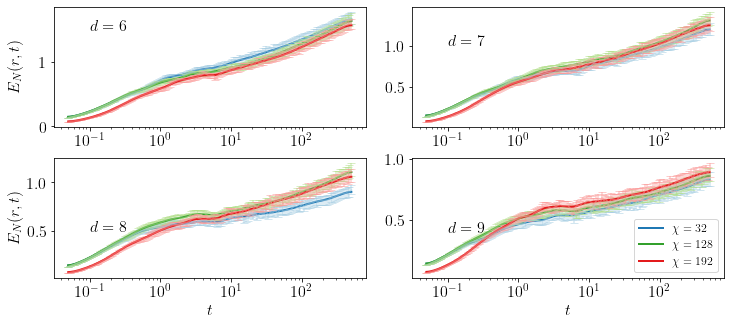

In [7]:
n = 24
d = 9.0
reps = 100
times = np.logspace(np.log10(0.05),np.log10(500),151,base=10,endpoint=True)

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Paired.colors)
mpl.rcParams['figure.figsize'] = (12,5)
plt.rcParams.update({'font.size': 16})
fig, axes = plt.subplots(2,2)
ax1,ax2 = axes[0]
bx1,bx2 = axes[1]
axlist = [ax1,ax2,bx1,bx2]
dlist = [6,7,8,9]
dc = 0
for d in dlist:
    ax = axlist[dc]
    for chimax in [32,128,192]:
        neg = []
        plist = []
        repcount = 0
        for p in range(reps):
            try:
                with h5py.File('data/dyn_L%s_X%s_d%.2f_p%.2f.h5' %(n,chimax,d,p),'r') as hf:
                    neg0 = np.array(hf.get('neg'))
                    err0 = np.array(hf.get('err'))
                    dE0 = np.array(np.real(hf.get('dE')))
                    ent = np.array(hf.get('ent'))
                    energy = np.array(np.real(hf.get('energy')))

                    neg += [neg0]

                    repcount += 1
            except:
                plist += [p]

        neg_avg = np.mean(neg,axis=0)
        neg_var = np.sqrt(np.var(neg,axis=0))/np.sqrt(repcount)

        for r in range(1):
            if r < 7:
                ax.errorbar(times,neg_avg[r],(neg_var[r]),fmt='-',capsize=4,alpha=0.5)
            else:
                ax.errorbar(times,neg_avg[r],(neg_var[r]),fmt='-',capsize=4,alpha=0.5)
            ax.plot(times,gf(neg_avg[r],3),linewidth=2,label=r'$\chi = %s$' %chimax)
            ax.set(xscale='log')
    dc += 1

ax1.text(0.1,1.5,r'$d=6$')
ax2.text(0.1,1.,r'$d=7$',zorder=2.5)
bx1.text(0.1,0.5,r'$d=8$',zorder=102.5)
bx2.text(0.1,.4,r'$d=9$')

plt.legend(fontsize=12,loc='lower right')
ax1.set(ylabel=r'$E_N(r,t)$')
bx1.set(ylabel=r'$E_N(r,t)$',xlabel=r'$t$')
bx2.set(xlabel=r'$t$')
fig.align_ylabels()
fig.align_xlabels()
plt.xlabel(r'$t$')
plt.subplots_adjust(hspace=0.25,wspace=0.15)
plt.savefig('SM_3.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

### SM 4

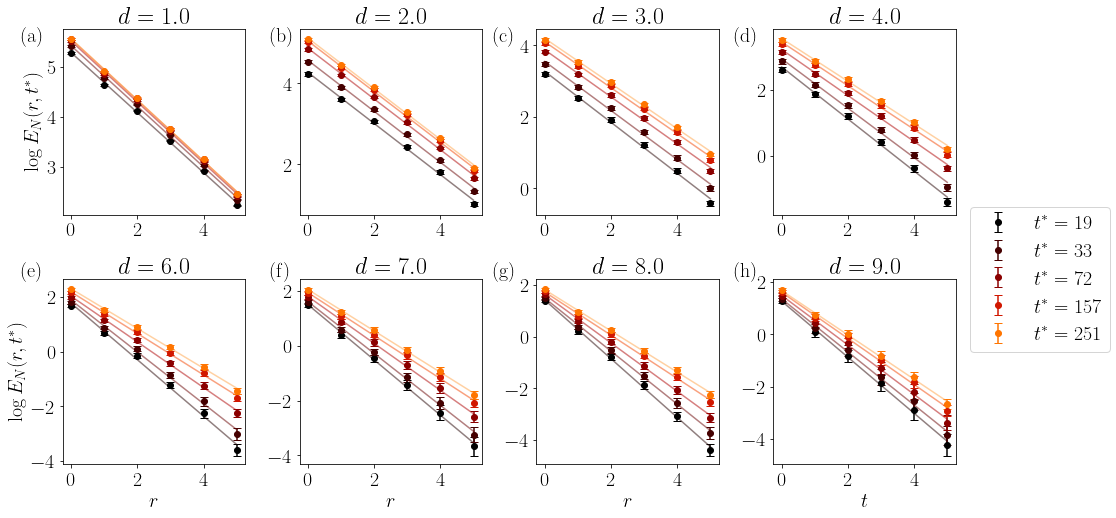

In [8]:
mpl.rcParams['figure.figsize'] = (16,8)
plt.rcParams.update({'font.size': 20})
nc = 12
color = plt.cm.gist_heat(np.linspace(0, 1,nc))
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20.colors)
fig, axes = plt.subplots(2,4)
ax1,ax2,ax3,ax4 = axes[0]
bx1,bx2,bx3,bx4 = axes[1]
axlist = [ax1,ax2,ax3,ax4,bx1,bx2,bx3,bx4]

n = 14
# d = 6.0
reps = 240
times = np.logspace(-1,2.4,151,base=10,endpoint=True)

dc = 0
for d in [1.0,2.0,3.0,4.0,6.0,7.0,8.0,9.0]:
    ax = axlist[dc]
    ax.set_prop_cycle(plt.cycler("color", color))
    for chimax in [128]:
        neg = np.zeros((reps,n,len(times)))
        err_avg = np.zeros((reps))
        dE_avg = np.zeros((reps))
        ent_avg = np.zeros((reps,len(times)))
        energy_avg = np.zeros((reps,len(times)))
        for p in range(reps):
            with h5py.File('data/dyn_L%s_X%s_d%.2f_p%.2f.h5' %(n,chimax,d,p),'r') as hf:
                neg0 = np.array(hf.get('neg'))
                err0 = np.array(hf.get('err'))
                dE0 = np.array(np.real(hf.get('dE')))
                ent = np.array(hf.get('ent'))[::,n//2]
                energy = np.array(np.real(hf.get('energy')))

                neg[p] = (2**neg0.real-1)/.2
                err_avg[p] = err0.real
                ent_avg[p] = ent
                energy_avg[p] = energy.real

        neg_avg = np.mean(neg,axis=0)
        neg_var = np.sqrt(np.var(neg,axis=0))/np.sqrt(reps)

        for t in [-1,-10,-25,-40,-50][::-1]:
            xilist0 = [neg_avg[r,t] for r in range(n)]
            xilist0_var = [neg_var[r,t] for r in range(n)]
            xilist0_var_log = np.array([xilist0_var[k]/xilist0[k] for k in range(lc)])

            lc = 6
            xilist = xilist0[0:lc]
            xilist0_var_log = xilist0_var_log[0:lc]

            fit,cov = np.polyfit(range(lc),np.log(xilist),1,cov=True)
            ax.errorbar(range(lc),np.log(xilist),xilist0_var_log,fmt='o',label=r'$t^{*} = %.0f$' %times[t],capsize=4)
            ax.plot(range(lc),[fit[0]*i + fit[1] for i in range(lc)],'-',alpha=0.5)
            
    ax.set(title=r'$d = %s$' %d)
    dc += 1
    
ax.legend(loc='center right',bbox_to_anchor=(1.9,1.),fontsize=20)
ax1.set(ylabel=r'$\log E_N(r,t^*)$')
bx1.set(ylabel=r'$\log E_N(r,t^*)$')
bx1.set(xlabel=r'$r$')
bx2.set(xlabel=r'$r$')
bx3.set(xlabel=r'$r$')
bx4.set(xlabel=r'$r$')
ax1.text(-1.5,5.5,r'(a)')
ax1.text(6,5.5,r'(b)')
ax1.text(12.75,5.5,r'(c)')
ax1.text(20,5.5,r'(d)')
bx1.text(-1.5,2.75,r'(e)')
bx1.text(6,2.75,r'(f)')
bx1.text(12.75,2.75,r'(g)')
bx1.text(20,2.75,r'(h)')
plt.xlabel(r'$t$')
plt.subplots_adjust(hspace=0.35,wspace=0.3)
plt.savefig('SM_4.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

### SM 5

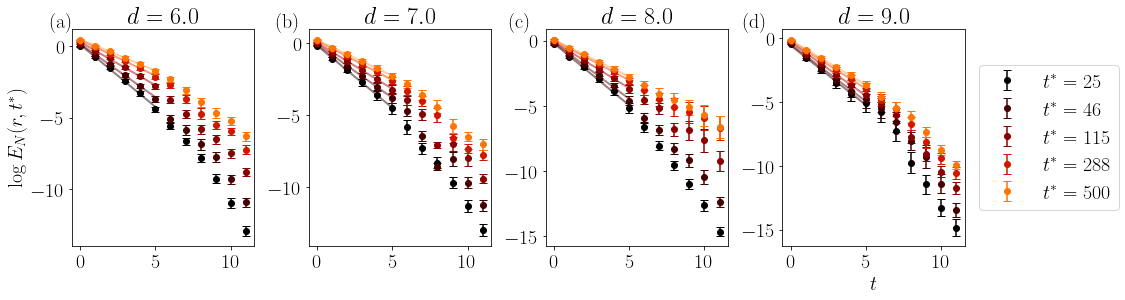

In [9]:
mpl.rcParams['figure.figsize'] = (16,4)
plt.rcParams.update({'font.size': 20})
nc = 12
color = plt.cm.gist_heat(np.linspace(0, 1,nc))
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20.colors)
fig, axes = plt.subplots(1,4)
ax1,ax2,ax3,ax4 = axes
axlist = [ax1,ax2,ax3,ax4]

n = 24
# d = 6.0
reps = 100
times = np.logspace(np.log10(0.05),np.log10(500),151,base=10,endpoint=True)

dc = 0
for d in [6.0,7.0,8.0,9.0]:
    ax = axlist[dc]
    ax.set_prop_cycle(plt.cycler("color", color))
    for chimax in [192]:
        neg = np.zeros((reps,n,len(times)))
        err_avg = np.zeros((reps))
        dE_avg = np.zeros((reps))
        ent_avg = np.zeros((reps,len(times)))
        energy_avg = np.zeros((reps,len(times)))
        for p in range(reps):
            with h5py.File('data/dyn_L%s_X%s_d%.2f_p%.2f.h5' %(n,chimax,d,p),'r') as hf:
                neg0 = np.array(hf.get('neg'))
                err0 = np.array(hf.get('err'))
                dE0 = np.array(np.real(hf.get('dE')))
                ent = np.array(hf.get('ent'))[::,n//2]
                energy = np.array(np.real(hf.get('energy')))

                neg[p] = neg0
                err_avg[p] = err0.real
                ent_avg[p] = ent
                energy_avg[p] = energy.real

        neg_avg = np.mean(neg,axis=0)
        neg_var = np.sqrt(np.var(neg,axis=0))/np.sqrt(reps)

        for t in [-1,-10,-25,-40,-50][::-1]:
            xilist0 = [neg_avg[r,t] for r in range(n)]
            xilist0_var = [neg_var[r,t] for r in range(n)]
            lc = n//2
            xilist0_var_log = np.array([xilist0_var[k]/xilist0[k] for k in range(lc)])
            
            xilist = xilist0[0:lc]
            xilist0_var_log = xilist0_var_log[0:lc]
            
            fit,cov = np.polyfit(range(lc//2),np.log(xilist[0:lc//2]),1,cov=True)
            ax.errorbar(range(lc),np.log(xilist),xilist0_var_log,fmt='o',label=r'$t^{*} = %.0f$' %times[t],capsize=4)
            ax.plot(range(lc//2),[fit[0]*i + fit[1] for i in range(lc//2)],'-',alpha=0.5,linewidth=2)
            
    ax.set(title=r'$d = %s$' %d)
    dc += 1
    
ax.legend(loc='center right',bbox_to_anchor=(1.9,.5),fontsize=20)
ax1.set(ylabel=r'$\log E_N(r,t^*)$')
ax1.text(-2,1.35,r'(a)')
ax1.text(13,1.35,r'(b)')
ax1.text(28.5,1.35,r'(c)')
ax1.text(44,1.35,r'(d)')
plt.xlabel(r'$t$')
plt.subplots_adjust(hspace=0.35,wspace=0.3)
plt.savefig('SM_5.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

### SM 6

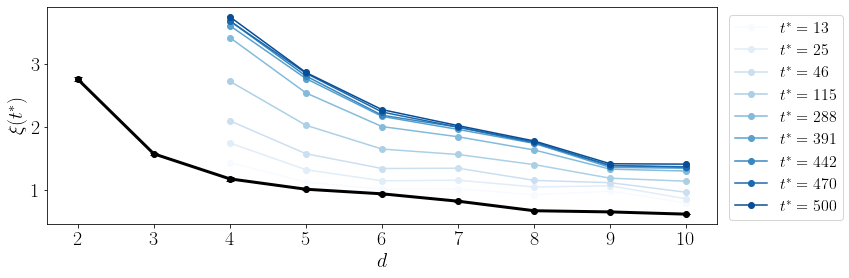

In [10]:
mpl.rcParams['figure.figsize'] = (12,4)
plt.rcParams.update({'font.size': 20})
nc = 10
color = plt.cm.Blues(np.linspace(0, 1,nc))
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", color)
fig, axes = plt.subplots(1,1)
ax1 = axes

axcount = 0
for n in [24]:

    reps = 100
    chimax = 192
    times = np.logspace(np.log10(0.05),np.log10(500),151,base=10,endpoint=True)
    dlist = [4.0,5.0,6.0,7.0,8.0,9.0,10.0]
    dc = 0
    tlist = [-1,-2,-3,-5,-10,-25,-40,-50,-60][::-1]
        
    xi_mat = np.zeros((len(dlist),len(tlist)))
        
    ax = ax1
    for d in dlist:

        neg = []
        for p in range(reps):
            try:
                with h5py.File('data/dyn_L%s_X%s_d%.2f_p%.2f.h5' %(n,chimax,d,p),'r') as hf:
                    neg0 = np.array(hf.get('neg'))
                    if n == 24 and len(neg0[0]) == 151:
                        neg += [neg0]
                    elif n != 24:
                        neg += [neg0]
            except:
                None

        neg = np.array(neg)
        neg_avg = np.mean(neg,axis=0)
        neg_var = np.var(neg,axis=0)

        tc = 0
        for t in tlist:
            xilist0 = [neg_avg[r,t] for r in range(n)]

            lc = n//4
            xilist = xilist0[0:lc]

            fit,cov = np.polyfit(range(lc),np.log(xilist),1,cov=True)
            xi_mat[dc,tc] = (-1/fit[0])

            tc += 1

        dc += 1
    
    for i in range(len(tlist)):
        ax.plot(dlist,xi_mat[::,i],'o-',label=r'$t^* = %.0f$' %times[tlist[i]])
    ax.legend(loc='upper right',fontsize=16,bbox_to_anchor=(1.2,1.))
    axcount += 1

ax1.errorbar(dis[::],anderson_xi_list[::],np.sqrt(anderson_xi_var[::]),fmt='ko-',label=r'Anderson ($L=128$)',capsize=4,linewidth=3)

ax2.errorbar(dis[::],anderson_xi_list[::],np.sqrt(anderson_xi_var[::]),fmt='ko-',label=r'Anderson ($L=128$)',capsize=4,linewidth=3)

plt.xlabel(r'$d$')
plt.ylabel(r'$\xi(t^*)$')
plt.savefig('SM_6.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

### SM 8

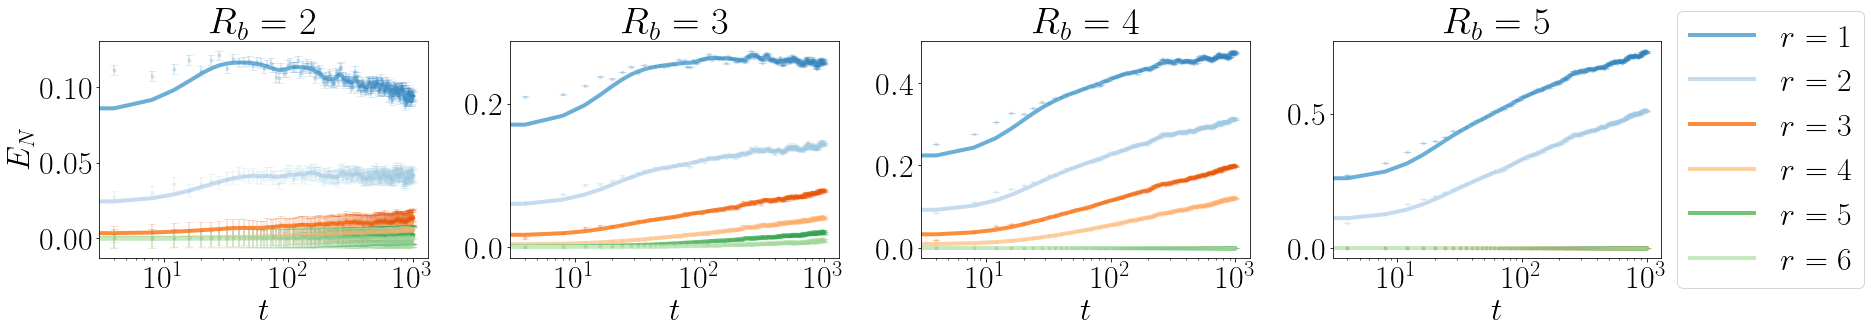

In [11]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20c.colors)
mpl.rcParams['figure.figsize'] = (28,4)
plt.rcParams.update({'font.size': 32})

fig, axes = plt.subplots(1,4)
ax1,ax2,bx1,bx2 = axes
# bx1,bx2 = axes[1]
axlist = [ax1,ax2,bx1,bx2]

n = 16
reps = 96
times = np.linspace(0,1000,251)
dlist = [6.0]
xilist = np.zeros(len(dlist))
covlist = np.zeros(len(dlist))

bc = 0
for block_size in [2,3,4,5]:
    ax = axlist[bc]
    for d in dlist:

        neg = np.zeros((reps,n,n,len(times)))

        for p in range(reps):
            with h5py.File('data/dyn_L%s_d%.2f_p%.2f.h5' %(n,d,p),'r') as hf:
                neg0 = np.array(hf.get('neg'))
                neg[p] = neg0

        neg = np.mean(neg,axis=0)
        var = np.sqrt(np.var(neg,axis=0))/np.sqrt(reps)

        for i in range(1,7):
            ax.errorbar(times,neg[block_size,i],var[block_size,i],fmt='.',alpha=0.15,linewidth=2,capsize=4)
            ax.plot(times,gf(neg[block_size,i],3),linewidth=4,label=r'$r$ = %s' %i)

    ax.set(title=r'$R_b$ = %s' %block_size)
    if ax == bx2:
        ax.legend(loc='center left',bbox_to_anchor=(1.,0.5))
    bc += 1
    
ax1.set(xscale='log',ylabel=r'$E_N$',xlabel=r'$t$')
ax2.set(xscale='log',xlabel=r'$t$')
bx1.set(xscale='log',xlabel=r'$t$')
bx2.set(xscale='log',xlabel=r'$t$')

plt.subplots_adjust(hspace=0.35,wspace=0.25)
plt.savefig('SM_8.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

### SM 9

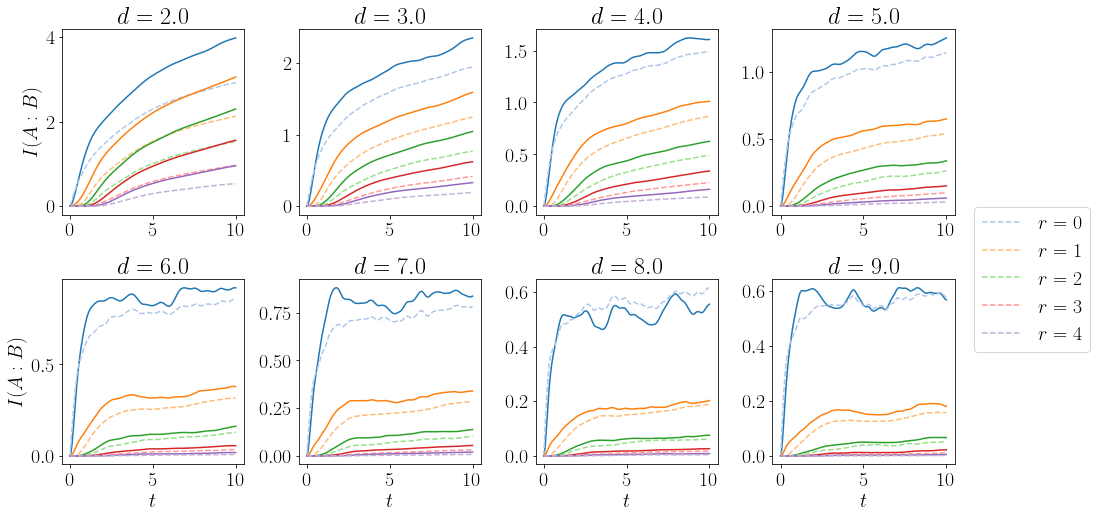

In [12]:
mpl.rcParams['figure.figsize'] = (16,8)
plt.rcParams.update({'font.size': 20})
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20.colors)
fig, axes = plt.subplots(2,4)
ax1,ax2,ax3,ax4 = axes[0]
bx1,bx2,bx3,bx4 = axes[1]
axlist = [ax1,ax2,ax3,ax4,bx1,bx2,bx3,bx4]

n = 12
reps = 100
times = np.logspace(-1,2.4,151,base=10,endpoint=True)

dc = 0
for d in [2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0]:
    ax = axlist[dc]
    for chimax in [192]:
        neg = []
        mut = []
        mcount = 0
        err_avg = np.zeros((reps))
        dE_avg = np.zeros((reps))
        ent_avg = np.zeros((reps,len(times)))
        energy_avg = np.zeros((reps,len(times)))
        for p in range(reps):
            try:
                with h5py.File('data/dyn_L%s_X%s_d%.2f_p%.2f.h5' %(n,chimax,d,p),'r') as hf:
                    neg0 = np.array(hf.get('neg'))
                    err0 = np.array(hf.get('err'))
                    mut_inf = np.array(hf.get('mut_inf'))
                    dE0 = np.array(np.real(hf.get('dE')))
                    ent = np.array(hf.get('ent'))[::,n//2]
                    energy = np.array(np.real(hf.get('energy')))
                    times = np.array(hf.get('times'))

                    neg += [neg0.real]
                    mut += [mut_inf]
                    mcount += 1
                    err_avg[p] = err0.real
                    ent_avg[p] = ent
                    energy_avg[p] = energy.real
            except:
                None

        neg_avg = np.mean(neg,axis=0)
        mut_avg = np.mean(mut,axis=0)
        neg_var = np.var(neg,axis=0)/reps


        for r in range(5):
            ax.plot(times,mut_avg[r],'-')
            ax.plot(times,neg_avg[r],'--',label=r'$r = %s$' %r)
            
    ax.set(title=r'$d = %s$' %d)

    dc += 1
ax.legend(loc='center right',bbox_to_anchor=(1.8,1.),fontsize=20)
ax1.set(ylabel=r'$I(A:B)$')
bx1.set(ylabel=r'$I(A:B)$')
bx1.set(xlabel=r'$t$')
bx2.set(xlabel=r'$t$')
bx3.set(xlabel=r'$t$')
bx4.set(xlabel=r'$t$')
plt.xlabel(r'$t$')
plt.subplots_adjust(hspace=0.35,wspace=0.3)
plt.savefig('SM_9.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.close()